In [116]:
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sys
import pandas as pd
import numpy as np


data_path = Path.cwd().parent / "data" / "processed" / "api_data_cleaned_merged.csv"
df = pd.read_csv(str(data_path),index_col=0)
df.index = df.Date
df = df.drop(columns=['Date'])

In [117]:
returns_df = df.pct_change().dropna()
returns_df = returns_df.dropna()

In [118]:
returns_df['GLD_momentum'] = returns_df['GLD']-returns_df['GLD'].shift(5)
returns_df['VIX_momentum'] = returns_df['^VIX']-returns_df['^VIX'].shift(5)
returns_df['WTImomentum_5'] = returns_df['CL=F'] - returns_df['CL=F'].shift(5)
returns_df['WTImomentum_21'] = returns_df['CL=F'] - returns_df['CL=F'].shift(21)

In [119]:
returns_df = returns_df.dropna()

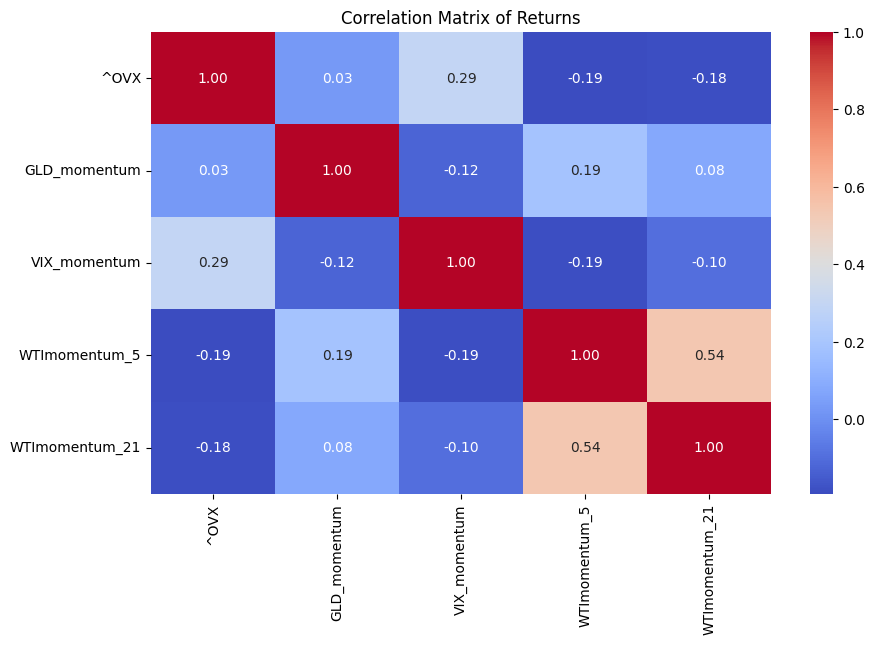

In [120]:
plt.figure(figsize=(10,6))
sns.heatmap(returns_df[['^OVX','GLD_momentum','VIX_momentum','WTImomentum_5','WTImomentum_21']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Returns")
plt.show()

# Three Features have been chosen with a 5-day long momentum period:

WTI oil futures, VIX, GLD - it is evident and expected that these features are not suitable for a linear model, and most likely using linear regression will not capture the relationship between these variables and oil volatility. I use momentum as the feature to model the volatility index because it has to capture direction, but also speed of movement. For the oil futures index I use both a short and long rolling window for momentum.